comparison of the results of Avellaneda-Stoikov and Gueant models

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv('D:/it/cmf/hft/week1/md/md/btcusdt_Binance_LinearPerpetual/lobs.csv')

we will test our model from T_begin = 03 (receive_ts = 1655953200999785662) hours to T_end = 09 hours (receive_ts = 1655974797846439628)

our volatility

In [3]:
df = df.loc[314000:957000,:]
df['btcusdt:Binance:LinearPerpetual_ask_price_0'].std()

121.22730583347499

In [4]:
df['receive_ts'] = pd.to_datetime(df['receive_ts'])

other parameters: 
k = 1.0

now we will tune our gamma coefficient in order to find optimal P&L graph

In [ ]:
plt.figure(figsize=(22,10))
plt.plot(df['receive_ts'], df['btcusdt:Binance:LinearPerpetual_ask_price_0'], color='black')
plt.xlabel('time')
plt.ylabel('price')
plt.title('BTC price', fontsize = 17)
plt.grid()
plt.show()

In [6]:
total_pnl_stoikov_1 = pd.read_csv('total_pnl_stoikov_1.csv')
total_pnl_stoikov_2 = pd.read_csv('total_pnl_stoikov_2.csv')
total_pnl_stoikov_3 = pd.read_csv('total_pnl_stoikov_3.csv')
total_pnl_stoikov_4 = pd.read_csv('total_pnl_stoikov_4.csv')
total_q_stoikov_1 = pd.read_csv('total_q_stoikov_1.csv')
total_q_stoikov_2 = pd.read_csv('total_q_stoikov_2.csv')
total_q_stoikov_3 = pd.read_csv('total_q_stoikov_3.csv')
total_q_stoikov_4 = pd.read_csv('total_q_stoikov_4.csv')

In [7]:
total_pnl_stoikov_1['receive_ts'] = pd.to_datetime(total_pnl_stoikov_1['receive_ts'])
total_pnl_stoikov_2['receive_ts'] = pd.to_datetime(total_pnl_stoikov_2['receive_ts'])
total_pnl_stoikov_3['receive_ts'] = pd.to_datetime(total_pnl_stoikov_3['receive_ts'])
total_pnl_stoikov_4['receive_ts'] = pd.to_datetime(total_pnl_stoikov_4['receive_ts'])
total_q_stoikov_1['1'] = pd.to_datetime(total_q_stoikov_1['1'])
total_q_stoikov_2['1'] = pd.to_datetime(total_q_stoikov_2['1'])
total_q_stoikov_3['1'] = pd.to_datetime(total_q_stoikov_3['1'])
total_q_stoikov_4['1'] = pd.to_datetime(total_q_stoikov_4['1'])

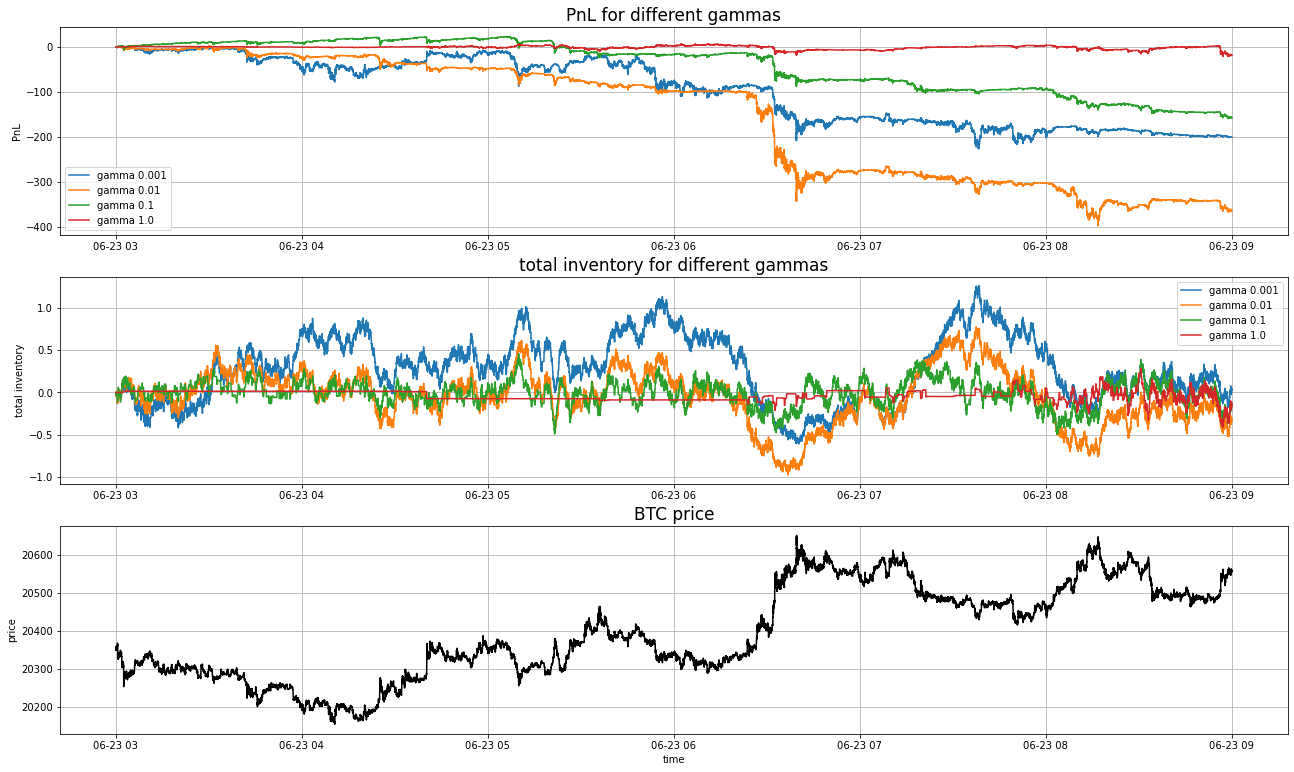

In [8]:
plt.figure(figsize=(22,13))

plt.subplot(3, 1, 1)
plt.plot(total_pnl_stoikov_1['receive_ts'],total_pnl_stoikov_1['total'], label = 'gamma 0.001')
plt.plot(total_pnl_stoikov_2['receive_ts'],total_pnl_stoikov_2['total'], label = 'gamma 0.01')
plt.plot(total_pnl_stoikov_3['receive_ts'],total_pnl_stoikov_3['total'], label = 'gamma 0.1')
plt.plot(total_pnl_stoikov_4['receive_ts'],total_pnl_stoikov_4['total'], label = 'gamma 1.0')
plt.ylabel('PnL')
plt.title('PnL for different gammas', fontsize=17)
plt.legend()
plt.grid()

plt.subplot(3,1,2)
plt.plot(total_q_stoikov_1['1'],total_q_stoikov_1['0'], label = 'gamma 0.001')
plt.plot(total_q_stoikov_2['1'],total_q_stoikov_2['0'], label = 'gamma 0.01')
plt.plot(total_q_stoikov_3['1'],total_q_stoikov_3['0'], label = 'gamma 0.1')
plt.plot(total_q_stoikov_4['1'],total_q_stoikov_4['0'], label = 'gamma 1.0')
plt.ylabel('total inventory')
plt.title('total inventory for different gammas', fontsize=17)
plt.legend()
plt.grid()

plt.subplot(3,1,3)
plt.plot(df['receive_ts'], df['btcusdt:Binance:LinearPerpetual_ask_price_0'], color='black')
plt.xlabel('time')
plt.ylabel('price')
plt.title('BTC price', fontsize=17)
plt.grid()

plt.show()

as we can see, model with gamma = 1.0 has very scarce amount of trades (thats why its pnl is about zero). this is because agent's bid-ask spread is huge (agent places orders so deep in order book) \
models with gammas = [0.01, 0.001] seem more sensitive to sharp changes in asset price. \
model with gamma = 0.1 seems more robust in comparison to other models. \
so we choose gamma = 0.1

now lets test gueant's model
we will consider the same gammas range (k =  1.0, A = 1.0)

In [9]:
total_pnl_gueant_1 = pd.read_csv('total_pnl_gueant_1.csv')
total_pnl_gueant_2 = pd.read_csv('total_pnl_gueant_2.csv')
total_pnl_gueant_3 = pd.read_csv('total_pnl_gueant_3.csv')
total_pnl_gueant_4 = pd.read_csv('total_pnl_gueant_4.csv')
total_q_gueant_1 = pd.read_csv('total_q_gueant_1.csv')
total_q_gueant_2 = pd.read_csv('total_q_gueant_2.csv')
total_q_gueant_3 = pd.read_csv('total_q_gueant_3.csv')
total_q_gueant_4 = pd.read_csv('total_q_gueant_4.csv')

In [10]:
total_pnl_gueant_1['receive_ts']=pd.to_datetime(total_pnl_gueant_1['receive_ts'])
total_pnl_gueant_2['receive_ts']=pd.to_datetime(total_pnl_gueant_2['receive_ts'])
total_pnl_gueant_3['receive_ts']=pd.to_datetime(total_pnl_gueant_3['receive_ts'])
total_pnl_gueant_4['receive_ts']=pd.to_datetime(total_pnl_gueant_4['receive_ts'])
total_q_gueant_1['1'] = pd.to_datetime(total_q_gueant_1['1'])
total_q_gueant_2['1'] = pd.to_datetime(total_q_gueant_2['1'])
total_q_gueant_3['1'] = pd.to_datetime(total_q_gueant_3['1'])
total_q_gueant_4['1'] = pd.to_datetime(total_q_gueant_4['1'])

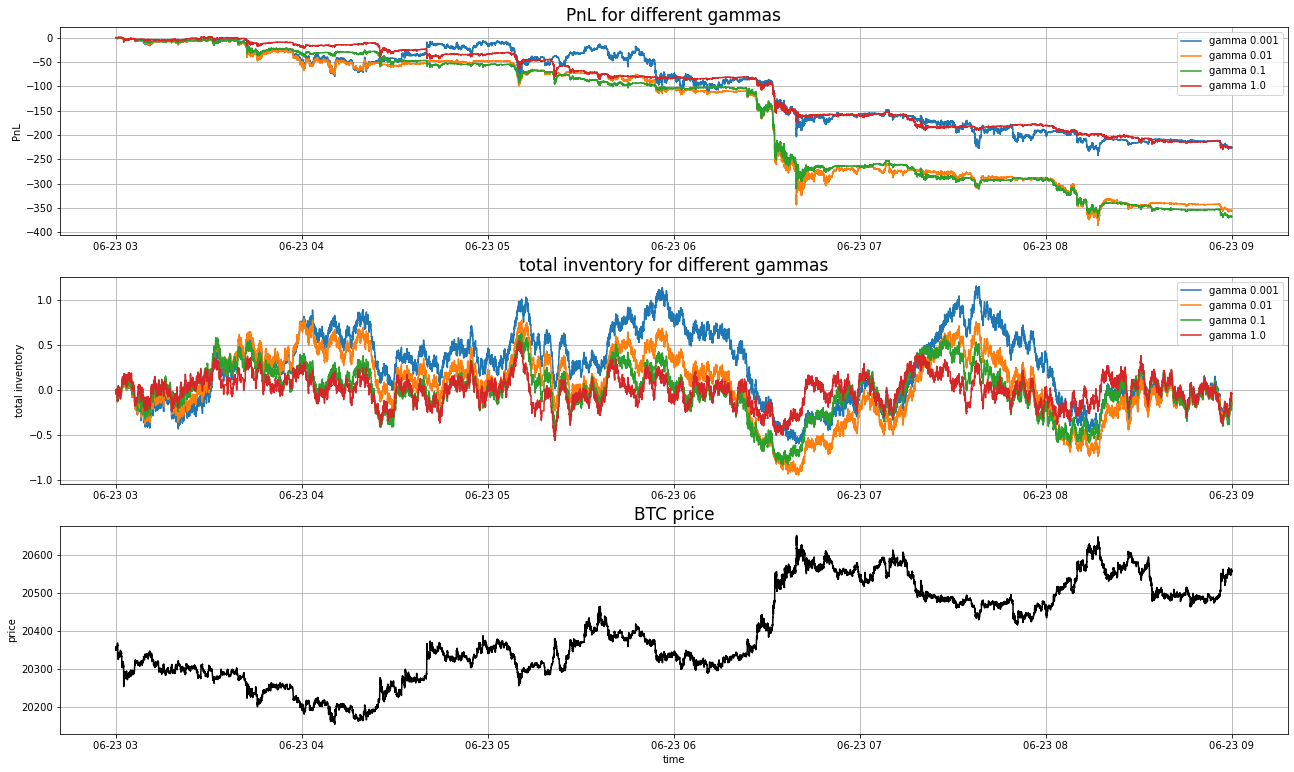

In [11]:
plt.figure(figsize=(22,13))

plt.subplot(3, 1, 1)
plt.plot(total_pnl_gueant_1['receive_ts'],total_pnl_gueant_1['total'], label = 'gamma 0.001')
plt.plot(total_pnl_gueant_2['receive_ts'],total_pnl_gueant_2['total'], label = 'gamma 0.01')
plt.plot(total_pnl_gueant_3['receive_ts'],total_pnl_gueant_3['total'], label = 'gamma 0.1')
plt.plot(total_pnl_gueant_4['receive_ts'],total_pnl_gueant_4['total'], label = 'gamma 1.0')
plt.ylabel('PnL')
plt.title('PnL for different gammas', fontsize=17)
plt.legend()
plt.grid()

plt.subplot(3,1,2)
plt.plot(total_q_gueant_1['1'],total_q_gueant_1['0'], label = 'gamma 0.001')
plt.plot(total_q_gueant_2['1'],total_q_gueant_2['0'], label = 'gamma 0.01')
plt.plot(total_q_gueant_3['1'],total_q_gueant_3['0'], label = 'gamma 0.1')
plt.plot(total_q_gueant_4['1'],total_q_gueant_4['0'], label = 'gamma 1.0')
plt.ylabel('total inventory')
plt.title('total inventory for different gammas', fontsize=17)
plt.legend()
plt.grid()

plt.subplot(3,1,3)
plt.plot(df['receive_ts'], df['btcusdt:Binance:LinearPerpetual_ask_price_0'], color='black')
plt.xlabel('time')
plt.ylabel('price')
plt.title('BTC price', fontsize=17)
plt.grid()

plt.show()

as we can see, in Gueant's model gammas = [0.1, 0.01] are inappropriate in comparison to [0.001, 1.0] gammas. \
lets take gamma = 0.001, because its P&L semms better than P&L when gamma = 1.0

but there is one problem - in Avellaneda-Stoikov and Gueant models authors suppose that volatility = const. obviously, it's not true. so lets try to calculate moving volatility.

In [12]:
total_pnl_gueant_moving_vol = pd.read_csv('total_pnl_gueant_moving_vol.csv')
total_pnl_stoikov_moving_vol = pd.read_csv('total_pnl_stoikov_moving_vol.csv')
total_q_gueant_moving_vol = pd.read_csv('total_q_gueant_moving_vol.csv')
total_q_stoikov_moving_vol = pd.read_csv('total_q_stoikov_moving_vol.csv')
volatility = pd.read_csv('moving_vol.csv')

In [13]:
total_pnl_gueant_moving_vol['receive_ts'] = pd.to_datetime(total_pnl_gueant_moving_vol['receive_ts'])
total_pnl_stoikov_moving_vol['receive_ts'] = pd.to_datetime(total_pnl_stoikov_moving_vol['receive_ts'])
total_q_gueant_moving_vol['1'] = pd.to_datetime(total_q_gueant_moving_vol['1'])
total_q_stoikov_moving_vol['1'] = pd.to_datetime(total_q_stoikov_moving_vol['1'])
volatility['1'] = pd.to_datetime(volatility['1'])

first of all, lets take a look on our volatility

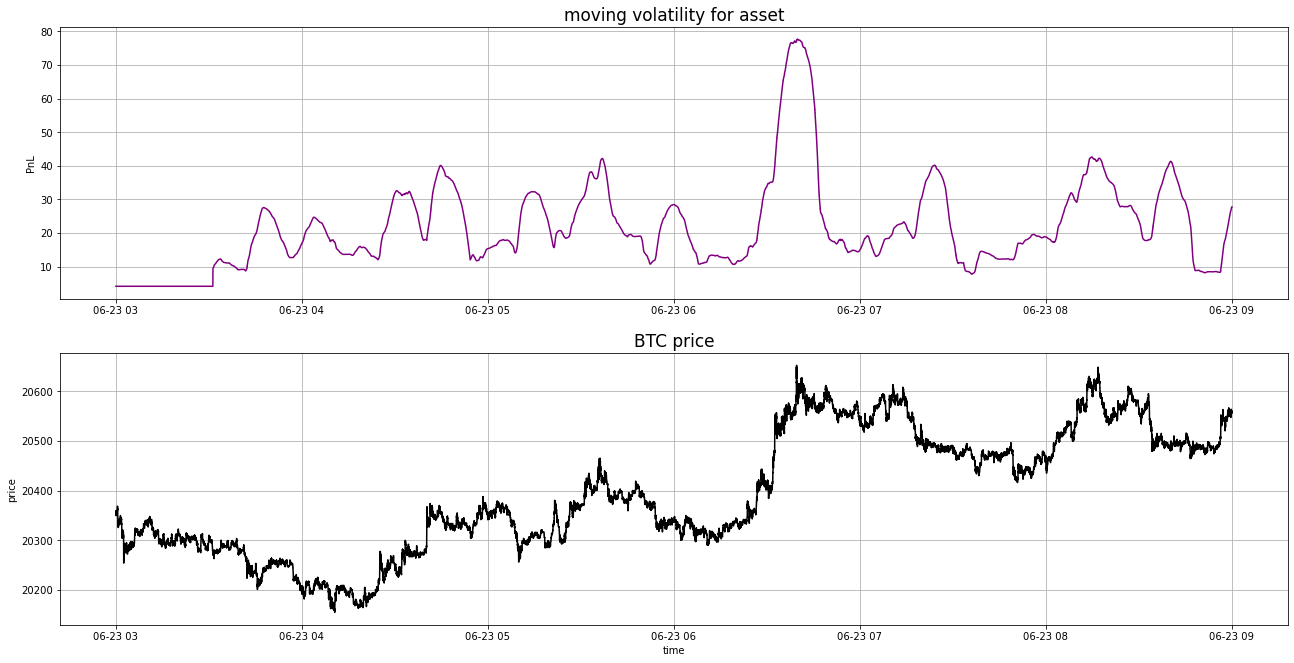

In [14]:
plt.figure(figsize=(22,11))

plt.subplot(2, 1, 1)
plt.plot(volatility['1'], volatility['0'], color='purple')
plt.ylabel('PnL')
plt.title('moving volatility for asset', fontsize=17)
plt.grid()

plt.subplot(2,1,2)
plt.plot(df['receive_ts'], df['btcusdt:Binance:LinearPerpetual_ask_price_0'], color='black')
plt.xlabel('time')
plt.ylabel('price')
plt.title('BTC price', fontsize=17)
plt.grid()

plt.show()

now lets compare results with constant volatility and moving volatility for Gueant's model (best gamma)

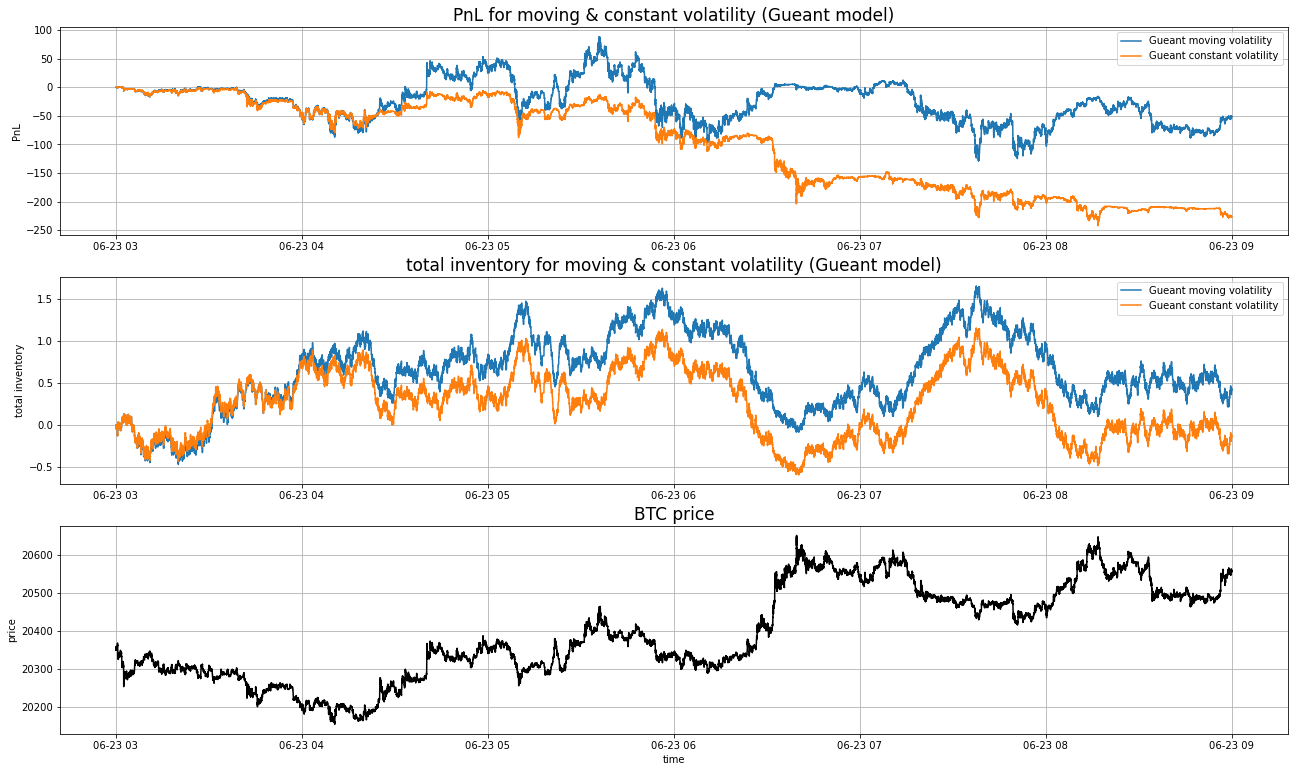

In [15]:
plt.figure(figsize=(22,13))

plt.subplot(3, 1, 1)
plt.plot(total_pnl_gueant_moving_vol['receive_ts'],total_pnl_gueant_moving_vol['total'], label = 'Gueant moving volatility')
plt.plot(total_pnl_gueant_1['receive_ts'],total_pnl_gueant_1['total'], label = 'Gueant constant volatility')
plt.ylabel('PnL')
plt.title('PnL for moving & constant volatility (Gueant model)', fontsize=17)
plt.legend()
plt.grid()

plt.subplot(3,1,2)
plt.plot(total_q_gueant_moving_vol['1'],total_q_gueant_moving_vol['0'], label = 'Gueant moving volatility')
plt.plot(total_q_gueant_1['1'],total_q_gueant_1['0'], label = 'Gueant constant volatility')
plt.ylabel('total inventory')
plt.title('total inventory for moving & constant volatility (Gueant model)', fontsize=17)
plt.legend()
plt.grid()

plt.subplot(3,1,3)
plt.plot(df['receive_ts'], df['btcusdt:Binance:LinearPerpetual_ask_price_0'], color='black')
plt.xlabel('time')
plt.ylabel('price')
plt.title('BTC price', fontsize=17)
plt.grid()

plt.show()

and lets do the same for Avellaneda-Stoikov model (best gamma)

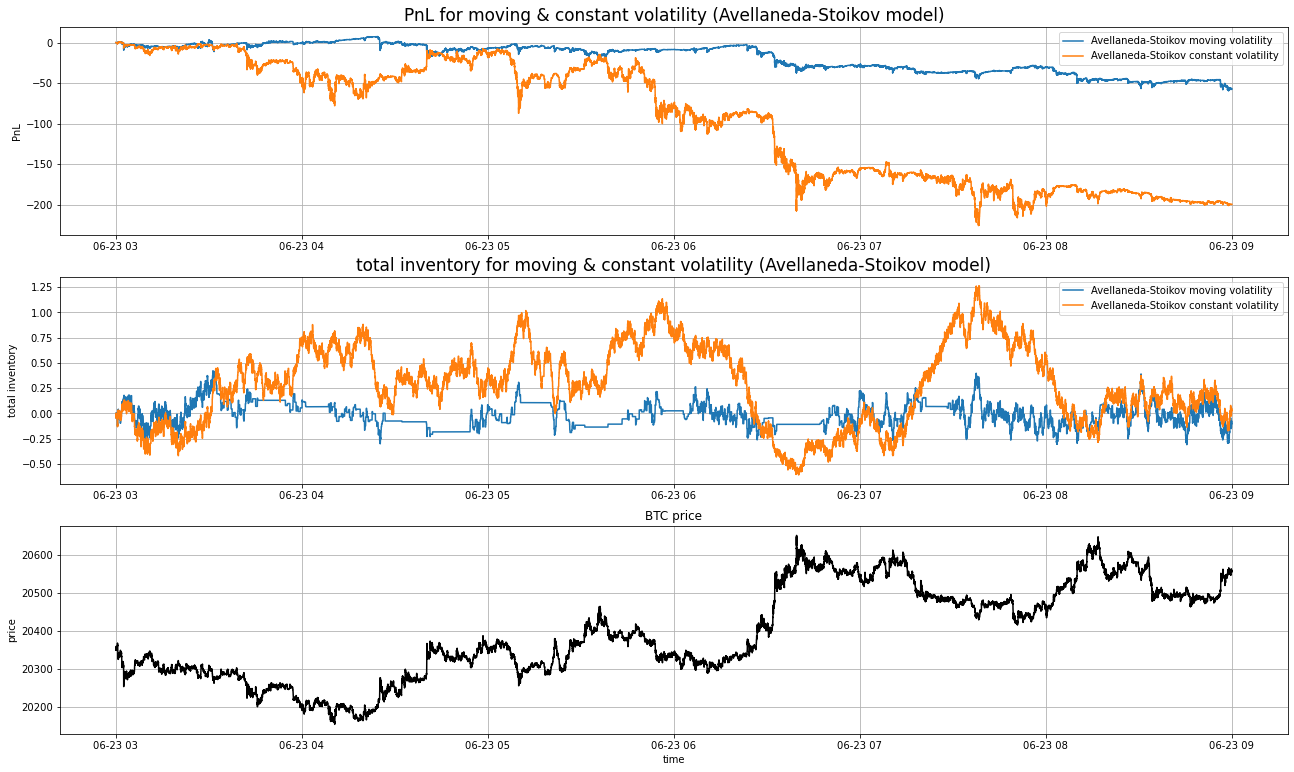

In [16]:
plt.figure(figsize=(22,13))

plt.subplot(3, 1, 1)
plt.plot(total_pnl_stoikov_moving_vol['receive_ts'],total_pnl_stoikov_moving_vol['total'], label = 'Avellaneda-Stoikov moving volatility')
plt.plot(total_pnl_stoikov_1['receive_ts'],total_pnl_stoikov_1['total'], label = 'Avellaneda-Stoikov constant volatility')
plt.ylabel('PnL')
plt.title('PnL for moving & constant volatility (Avellaneda-Stoikov model)', fontsize=17)
plt.legend()
plt.grid()

plt.subplot(3,1,2)
plt.plot(total_q_stoikov_moving_vol['1'],total_q_stoikov_moving_vol['0'], label = 'Avellaneda-Stoikov moving volatility')
plt.plot(total_q_stoikov_1['1'],total_q_stoikov_1['0'], label = 'Avellaneda-Stoikov constant volatility')
plt.ylabel('total inventory')
plt.title('total inventory for moving & constant volatility (Avellaneda-Stoikov model)', fontsize=17)
plt.legend()
plt.grid()

plt.subplot(3,1,3)
plt.plot(df['receive_ts'], df['btcusdt:Binance:LinearPerpetual_ask_price_0'], color='black')
plt.xlabel('time')
plt.ylabel('price')
plt.title('BTC price')
plt.grid()

plt.show()

finally, lets compare these 4 models!

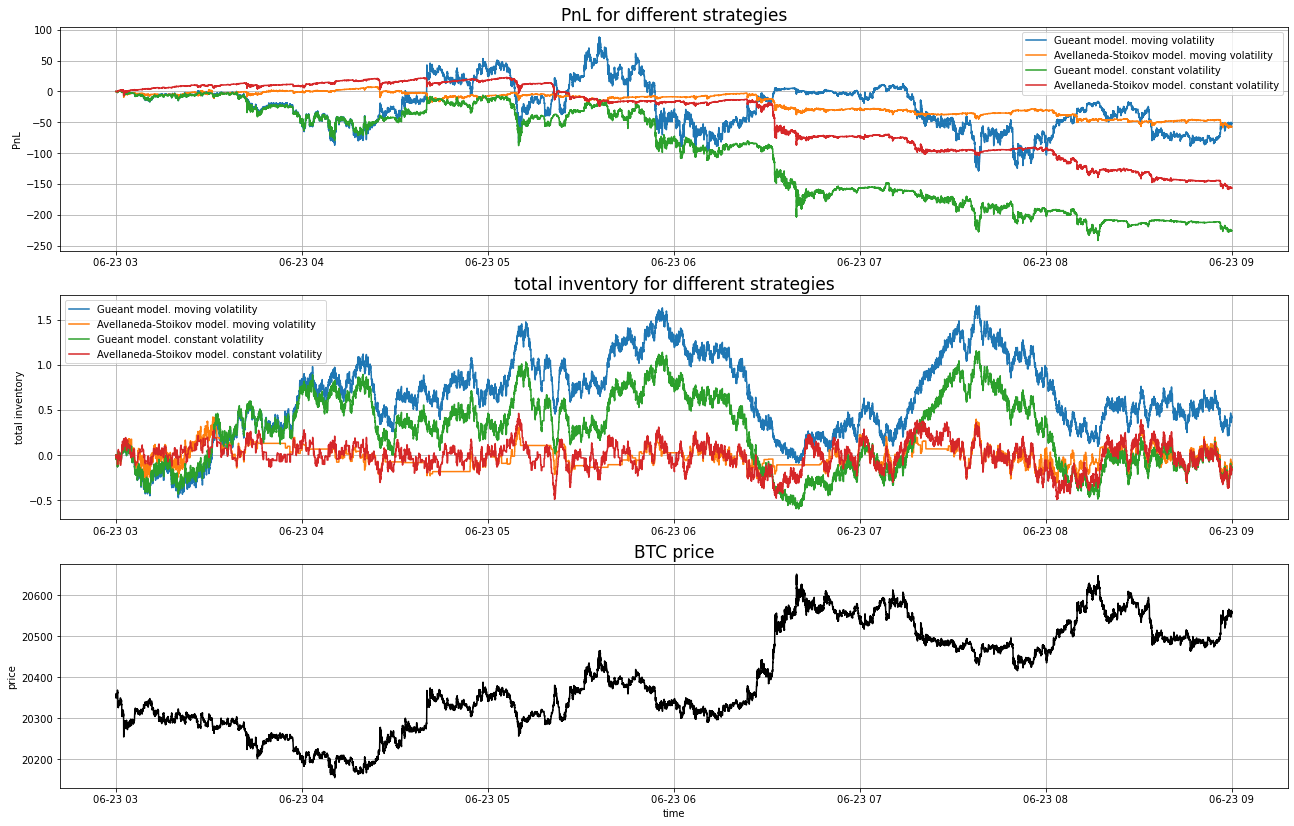

In [17]:
plt.figure(figsize=(22,14))

plt.subplot(3, 1, 1)
plt.plot(total_pnl_gueant_moving_vol['receive_ts'], total_pnl_gueant_moving_vol['total'], label = 'Gueant model. moving volatility')
plt.plot(total_pnl_stoikov_moving_vol['receive_ts'], total_pnl_stoikov_moving_vol['total'], label = 'Avellaneda-Stoikov model. moving volatility')
plt.plot(total_pnl_gueant_1['receive_ts'], total_pnl_gueant_1['total'], label = 'Gueant model. constant volatility')
plt.plot(total_pnl_stoikov_3['receive_ts'], total_pnl_stoikov_3['total'], label = 'Avellaneda-Stoikov model. constant volatility')
plt.ylabel('PnL')
plt.title('PnL for different strategies', fontsize=17)
plt.legend()
plt.grid()

plt.subplot(3,1,2)
plt.plot(total_q_gueant_moving_vol['1'], total_q_gueant_moving_vol['0'], label = 'Gueant model. moving volatility')
plt.plot(total_q_stoikov_moving_vol['1'], total_q_stoikov_moving_vol['0'], label = 'Avellaneda-Stoikov model. moving volatility')
plt.plot(total_q_gueant_1['1'], total_q_gueant_1['0'], label = 'Gueant model. constant volatility')
plt.plot(total_q_stoikov_3['1'], total_q_stoikov_3['0'], label = 'Avellaneda-Stoikov model. constant volatility')
plt.ylabel('total inventory')
plt.title('total inventory for different strategies', fontsize=17)
plt.legend()
plt.grid()


plt.subplot(3,1,3)
plt.plot(df['receive_ts'], df['btcusdt:Binance:LinearPerpetual_ask_price_0'], color='black')
plt.xlabel('time')
plt.ylabel('price')
plt.title('BTC price', fontsize=17)
plt.grid()

plt.show()

as we can see, moving volatility really improves our PnL behavior (in both models).

lets create final table with different parameters

In [21]:
table = {'model name': ['Avellaneda-Stoikov', 'Gueant', 'Avellaneda-Stoikov', 'Gueant'],
         'volatility': ['constant', 'constant', 'moving', 'moving'],
         'pnl': [list(total_pnl_stoikov_3['total'])[-1], list(total_pnl_gueant_1['total'])[-1],
                list(total_pnl_stoikov_moving_vol['total'])[-1], list(total_pnl_gueant_moving_vol['total'])[-1]],
         'ppm': [-375.611, -315.134, -276.133, -70.821], #profit per million
         'gamma': [0.1, 0.001, 0.1, 0.001],
         'traded volume': [20.409, 35.241, 10.197, 35.577]} #total trades * volume of trade
table = pd.DataFrame(table)

In [22]:
table

,model name,volatility,pnl,ppm,gamma,traded volume
0,Avellaneda-Stoikov,constant,-156.707,-375.611,0.100,20.409
1,Gueant,constant,-226.036,-315.134,0.001,35.241
2,Avellaneda-Stoikov,moving,-57.326,-276.133,0.100,10.197
3,Gueant,moving,-51.398,-70.821,0.001,35.577
